In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dog_original_color.jpg to dog_original_color.jpg


## Exercise 1 – Contrast and Brightness Exploration


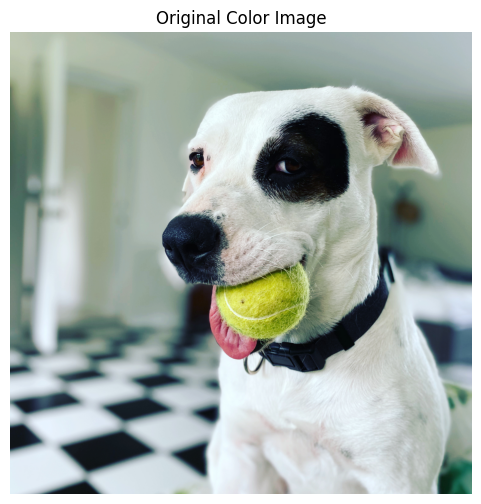

In [3]:
img = cv2.imread('dog_original_color.jpg', cv2.IMREAD_COLOR)

plt.figure(figsize=(6,6))
plt.imshow(img[:, :, ::-1])  # BGR → RGB for display
plt.axis('off')
plt.title('Original Color Image')
plt.show()

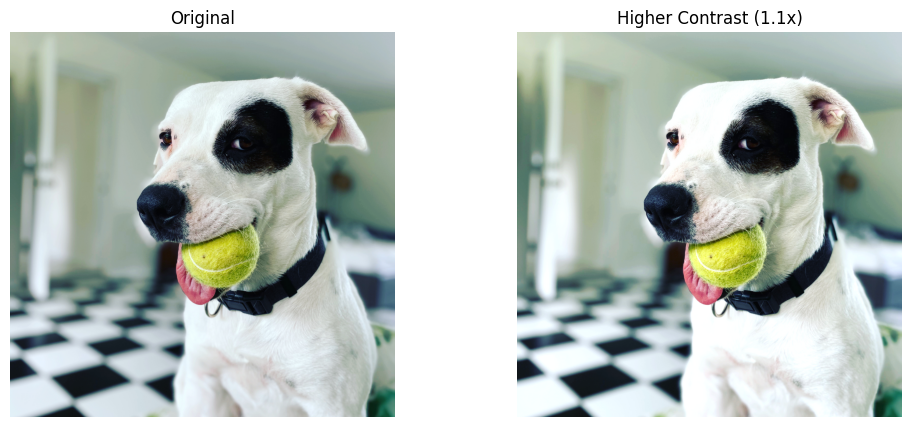

In [4]:
matrix_ones = np.ones(img.shape, dtype=np.float64)

img_higher1 = np.clip(img * matrix_ones * 1.1, 0, 255).astype(np.uint8)

plt.figure(figsize=[12,5])
plt.subplot(121); plt.imshow(img[:, :, ::-1]);         plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(img_higher1[:, :, ::-1]); plt.title('Higher Contrast (1.1x)'); plt.axis('off')
plt.show()

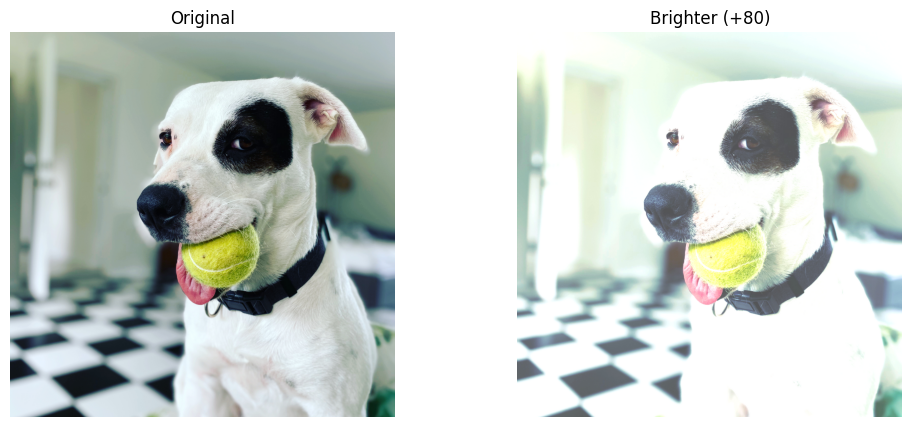

In [7]:
img_brighter = np.clip(img.astype(np.int16) + 80, 0, 255).astype(np.uint8)

plt.figure(figsize=[12,5])
plt.subplot(121); plt.imshow(img[:, :, ::-1]);         plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brighter (+80)'); plt.axis('off')
plt.show()

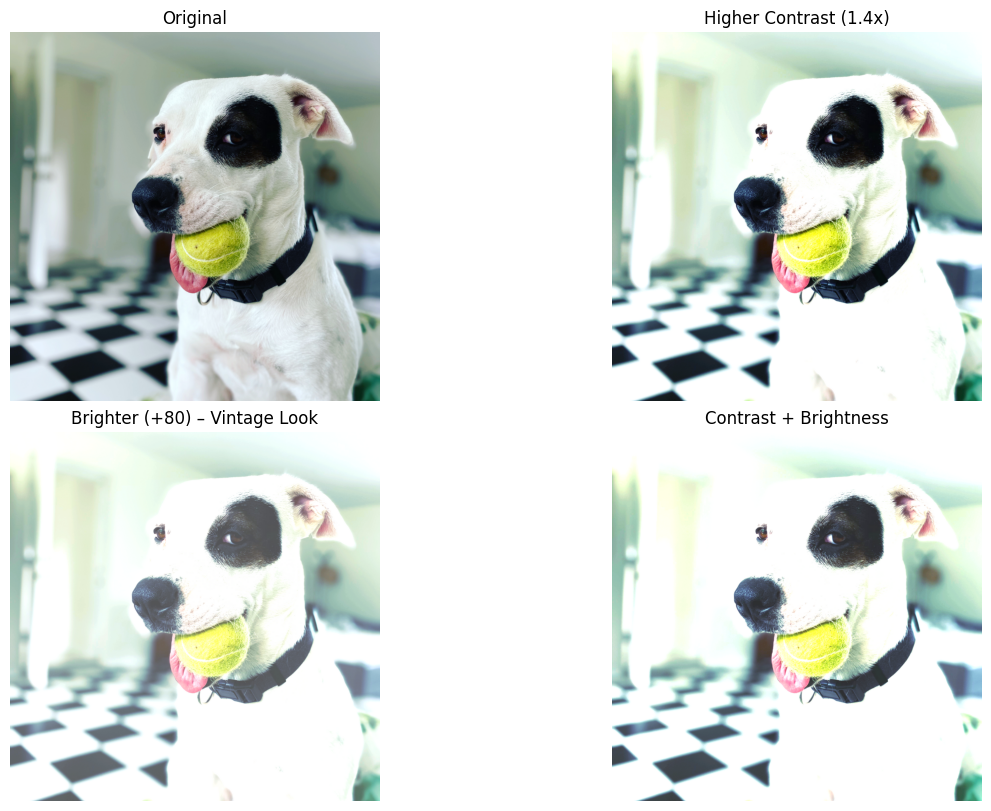

In [12]:
fig, axes = plt.subplots(
    2, 2,
    figsize=(12, 8),
    constrained_layout=True
)

axes[0, 0].imshow(img[:, :, ::-1])
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_contrast[:, :, ::-1])
axes[0, 1].set_title('Higher Contrast (1.4x)')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_bright[:, :, ::-1])
axes[1, 0].set_title('Brighter (+80) – Vintage Look')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_combo[:, :, ::-1])
axes[1, 1].set_title('Contrast + Brightness')
axes[1, 1].axis('off')

plt.show()

## Exercise 2 – Thresholding (Grayscale Images)

In [14]:
from google.colab import files
uploaded = files.upload()

Saving dog_grayscale.jpg to dog_grayscale.jpg


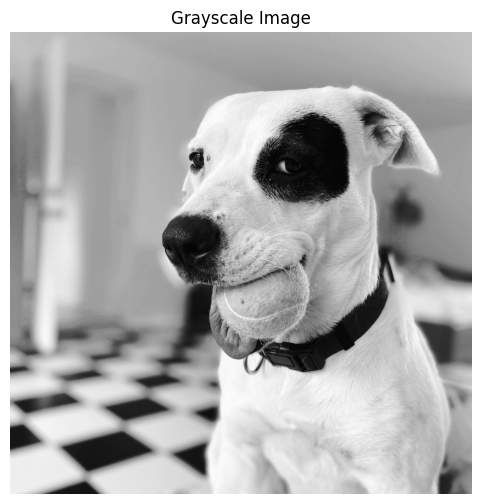

In [15]:
img_gray = cv2.imread('dog_grayscale.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

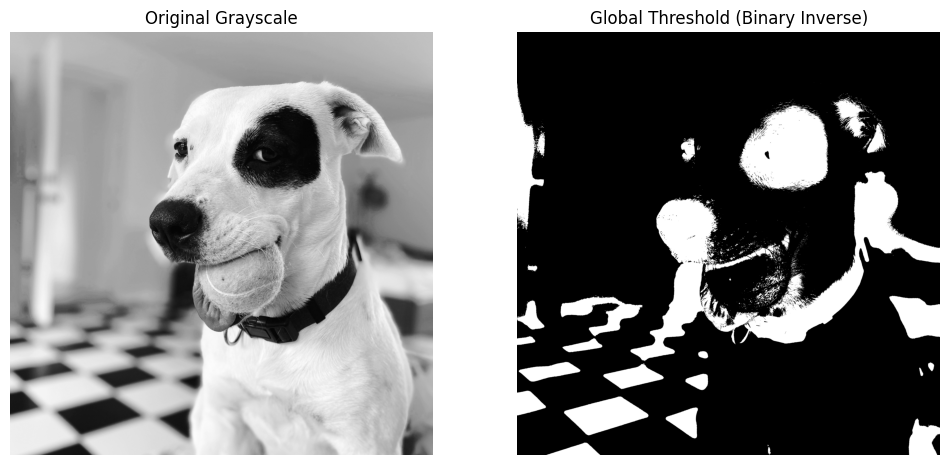

In [16]:
# Global thresholding (binary inverse)
retval, img_thresh = cv2.threshold(
    img_gray,
    130,          # threshold value
    255,          # max value
    cv2.THRESH_BINARY_INV
)

# Display original and thresholded images
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_thresh, cmap='gray')
plt.title('Global Threshold (Binary Inverse)')
plt.axis('off')

plt.show()

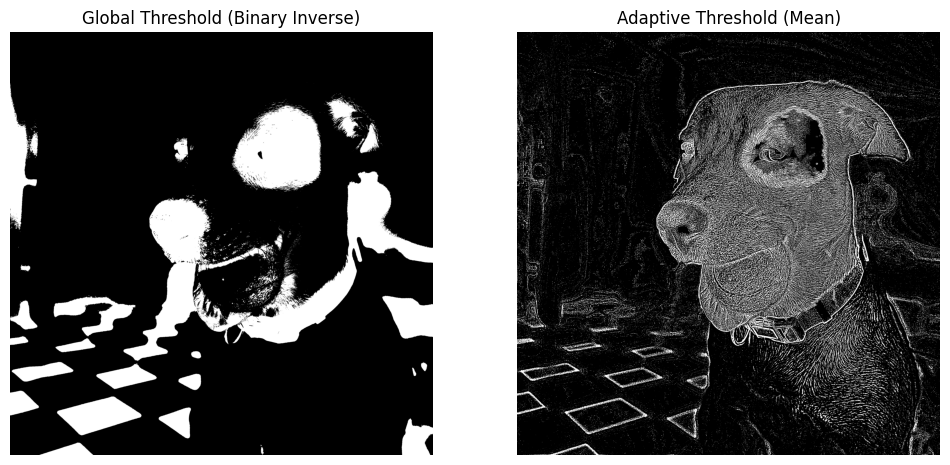

In [17]:
# Adaptive thresholding
img_adaptive = cv2.adaptiveThreshold(
    img_gray,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    11,   # block size (must be odd)
    2     # constant subtracted from mean
)

# Display global vs adaptive thresholding
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(img_thresh, cmap='gray')
plt.title('Global Threshold (Binary Inverse)')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_adaptive, cmap='gray')
plt.title('Adaptive Threshold (Mean)')
plt.axis('off')

plt.show()

**Observation:**  
Global thresholding applies a single cutoff value to the entire image, while adaptive thresholding adjusts the threshold locally, which helps preserve details under uneven lighting.